![image](https://github.com/nicolas-thiers/Mec-270-Lab/blob/main/Lab04/Images/logo-mecanica.png?raw=1)

# Laboratorio 4: Resolución de ecuaciones no lineales

Este notebook repasa los métodos numéricos de la bisección, Newton y la secante para encontrar las raíces de ecuaciones no lineales. Se incluye una breve revisión de la teoría y los algoritmos generales de cada método, seguida de ejercicios prácticos.

## 1. Repaso de la teoría

**Problema General:** Encontrar la raíz $\vec{x}^*$ de una ecuación no lineal de la forma $f(\vec{x}) = \vec{0}$.

En el caso unidimensional ($N=1$), el problema se reduce a encontrar $x^*$ tal que $f(x^*) = 0$.

<p align="center">
    <img src="https://github.com/nicolas-thiers/Mec-270-Lab/blob/main/Lab04/Images/nonLinFunc.svg?raw=1" alt="drawing" width="500"/>
</p>

### 1.1 Método de la Bisección

El método de la bisección se aplica a una función continua $f(x)$ en un intervalo $[a, b]$ donde $f(a)f(b) < 0$. Esta condición asegura, por el Teorema del Valor Intermedio, que existe al menos una raíz en el intervalo.

El método reduce iterativamente el tamaño del intervalo, dividiéndolo por la mitad y seleccionando el sub intervalo donde la función cambia de signo.

La convergencia del método es lineal, y el error se reduce a la mitad en cada iteración.

El número de iteraciones necesarias para alcanzar una tolerancia $tol$ se puede estimar mediante la fórmula: $$\log_2(\frac{b-a}{tol})$$

**Algoritmo General:**
1. Dado un intervalo $[a, b]$ y una tolerancia $tol$.
2. Mientras $(b - a) > tol$:
   
   a. Calcular el punto medio: $mid = a + (b - a) / 2$.
   
   b. Si $sign(f(mid)) == sign(f(a))$, entonces la raíz está en $[mid, b]$, por lo tanto, $a = mid$.
   
   c. Si no, la raíz está en $[a, mid]$, por lo tanto, $b = mid$.

   d. Volver al punto 2.
   
4. El punto medio del último intervalo $[a, b]$ es una aproximación de la raíz.

<p align="center">
    <img src="https://github.com/nicolas-thiers/Mec-270-Lab/blob/main/Lab04/Images/bisection-00.svg?raw=1" alt="drawing" width="500"/>
</p>

In [12]:
def Biseccion(f_, a_, b_, tol_=1e-6):
    """
    Método de la Bisección para encontrar raíces de una función.

    Parámetros:
    f_: Función a evaluar.
    a_, b_: Extremos del intervalo inicial [a, b].
    tol_: Tolerancia para el criterio de parada.

    Retorna:
    xHat: Aproximación de la raíz.
    """
    if f_(a_) * f_(b_) >= 0:
        raise ValueError("La función debe cambiar de signo en el intervalo [a, b].")

    while (b_ - a_) > tol_:
        mid = (a_ + b_) / 2
        if abs(f_(mid)) < tol_:
            return mid

        if f_(a_) * f_(mid) < 0:
            b_ = mid
        else:
            a_ = mid

    xHat = (a_ + b_) / 2
    return xHat

### 1.2 Método de Newton (Newton-Raphson)

El método de Newton se basa en la expansión en serie de Taylor de primer orden de la función $f(x)$ alrededor de una aproximación inicial $x_0$: $f(x) ≈ f(x_0) + f'(x_0)(x - x_0)$. Se busca la raíz de esta aproximación lineal, lo que lleva a la fórmula iterativa:
$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$

Geométricamente, $x_{k+1}$ es la intersección de la tangente a la curva $f(x)$ en el punto $(x_k, f(x_k))$ con el eje x. Para raíces simples, el método de Newton tiene una convergencia cuadrática local, lo que significa que el error se eleva al cuadrado en cada iteración. Para raíces múltiples de multiplicidad $m$, la convergencia es lineal con una constante de error $C = 1 - 1/m$.

La convergencia del método depende de la elección del punto inicial $x_0$.

**Algoritmo General:**
1. Dado un valor inicial $x_0$ y una tolerancia $tol$.
   
2. Mientras que $|f(x_k)| > tol$ (u otro criterio de parada):

   a. Calcular $f(x_k)$ y $f'(x_k)$.

   b. Actualizar la aproximación: $x_{k+1} = x_k - f(x_k) / f'(x_k)$.

   c. $k = k + 1$.

   d. Volver al punto 2.

5. $x_k$ es una aproximación de la raíz.

<p align="center">
    <img src="https://github.com/nicolas-thiers/Mec-270-Lab/blob/main/Lab04/Images/newtonRaphson-f3-00.svg?raw=1" alt="drawing" width="500"/>
</p>

In [14]:
### def Newton(f_,df_,x0_,tol_=1e-6):
###     return xHat
def Newton(f_, df_, x0_, tol_=1e-6):
    """
    Método de Newton-Raphson para encontrar raíces de una función.

    Parámetros:
    f_: Función a evaluar.
    df_: Derivada de la función.
    x0_: Aproximación inicial.
    tol_: Tolerancia para el criterio de parada.

    Retorna:
    xHat: Aproximación de la raíz.
    """
    x = x0_
    while True:
        fx = f_(x)
        if abs(fx) < tol_:
            return x

        dfx = df_(x)
        if dfx == 0:
            raise ValueError("Derivada cero. El método no puede continuar.")

        x = x - fx / dfx
        xHat = x
    return xHat


### 1.3 Método de la Secante

El método de la secante es una variante del método de Newton que aproxima la derivada $f'(x_k)$ utilizando una diferencia finita basada en dos puntos anteriores, $x_k$ y $x_{k-1}$:
$$f'(x_k) ≈ \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$$
Sustituyendo esta aproximación en la fórmula del método de Newton, se obtiene la fórmula iterativa del método de la secante:
$$x_{k+1} = x_k - f(x_k) \frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}$$
Geométricamente, $x_{k+1}$ es la intersección con el eje x de la recta secante que pasa por los puntos $(x_{k-1}, f(x_{k-1}))$ y $(x_k, f(x_k))$. El método de la secante no requiere el cálculo explícito de la derivada. Su tasa de convergencia es superlineal, aproximadamente $\phi ≈ 1.618$ (la proporción áurea), que es más rápida que la convergencia lineal del método de la bisección, pero más lenta que la convergencia cuadrática del método de Newton.

**Algoritmo General:**
1. Dados dos valores iniciales $x_0$ y $x_1$, y una tolerancia $tol$.
   
2. Mientras que $|f(x_k)| > tol$ (u otro criterio de parada):

   a. Calcular $f(x_k)$ y $f(x_{k-1})$.

   b. Actualizar la aproximación: $x_{k+1} = x_k - f(x_k) (x_k - x_{k-1}) / (f(x_k) - f(x_{k-1}))$.

   c. $x_{k-1} = x_k$.

   d. $x_k = x_{k+1}$.

   e. $k = k + 1$.

   f. Volver al punto 2.

4. $x_k$ es una aproximación de la raíz.

<p align="center">
    <img src="https://github.com/nicolas-thiers/Mec-270-Lab/blob/main/Lab04/Images/secante-f3-00.svg?raw=1" alt="drawing" width="500"/>
</p>

In [18]:
### def Secante(f_,x0_,x1_,tol_=1e-6):
###     return xHat

def Secante(f_, x0_, x1_, tol_=1e-6):
    """
    Método de la Secante para encontrar raíces de una función.

    Parámetros:
    f_: Función a evaluar.
    x0_, x1_: Dos aproximaciones iniciales.
    tol_: Tolerancia para el criterio de parada.

    Retorna:
    xHat: Aproximación de la raíz.
    """
    x_prev, x_curr = x0_, x1_
    f_prev, f_curr = f_(x_prev), f_(x_curr)

    while True:
        if abs(f_curr) < tol_:
            return x_curr

        if f_curr == f_prev:
            raise ValueError("División por cero. Los valores de la función son iguales.")

        x_next = x_curr - f_curr * (x_curr - x_prev) / (f_curr - f_prev)
        x_prev, x_curr = x_curr, x_next
        f_prev, f_curr = f_curr, f_(x_curr)
        xHat = x_curr
    return xHat

## 2. Perdida de carga en tuberias

Utilizaremos los métodos previos para calcular coeficientes de fricción para pérdida de carga en tuberías utilizando la ecuación de Colebrook–White, formula basada en mediciones experimentales para flujos turbulentos en tuberías con rugosidad interna.

La ecuación de Colebrook–White es la siguiente:
$$\frac{1}{\sqrt{f}} = -2 \log_{10}\left(\frac{\varepsilon}{3.7} + \frac{2.51}{Re\sqrt{f}}\right)$$

Donde:
- $f$ es el coeficiente de fricción.
- $\varepsilon$ es la rugosidad relativa de la tubería.
- $Re$ es el número de Reynolds de la tubería.

Realice un gráfico del coeficiente de fricción $f$ respecto al número de Reynolds para valores entre $[4\times10^3,10^6]$ para los valores de rugosidad superficial $\varepsilon= {10^{-2},10^{-3},10^{-4}}$

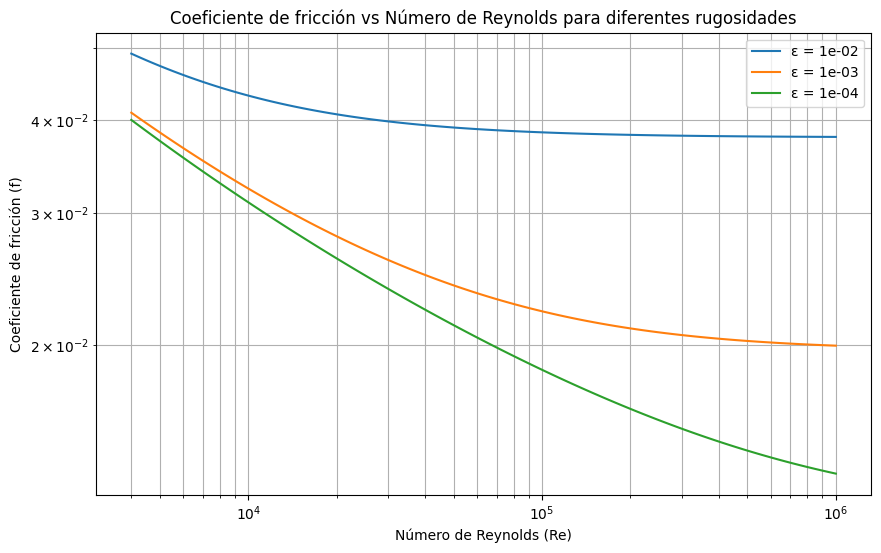

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def colebrook(f, Re, epsilon):
    """Función para la ecuación de Colebrook-White"""
    return 1/np.sqrt(f) + 2*np.log10((epsilon/3.7) + (2.51/(Re*np.sqrt(f))))

def solve_colebrook(Re, epsilon, method='newton'):
    """Resuelve la ecuación de Colebrook-White para f dado Re y epsilon"""
    # Función objetivo para encontrar la raíz
    def func(f):
        return 1/np.sqrt(f) + 2*np.log10((epsilon/3.7) + (2.51/(Re*np.sqrt(f))))

    # Derivada de la función objetivo
    def dfunc(f):
        term1 = -0.5 * f**(-1.5)
        term2_num = -2 * 2.51 / (Re * np.log(10))
        term2_den = (epsilon/3.7 + 2.51/(Re*np.sqrt(f))) * f**1.5
        return term1 + term2_num / term2_den

    # Estimación inicial (usando la aproximación de Swamee-Jain)
    f0 = 0.25 / (np.log10((epsilon/3.7) + (5.74/Re**0.9)))**2

    if method == 'newton':
        return Newton(func, dfunc, f0)
    elif method == 'secante':
        return Secante(func, f0*0.9, f0*1.1)
    elif method == 'biseccion':
        return Biseccion(func, 0.001, 0.1)  # f está típicamente entre 0.001 y 0.1
    else:
        raise ValueError("Método no reconocido")

# Parámetros para el gráfico
Re_values = np.logspace(np.log10(4e3), np.log10(1e6), 100)
epsilons = [1e-2, 1e-3, 1e-4]

# Crear el gráfico
plt.figure(figsize=(10, 6))

for epsilon in epsilons:
    f_values = []
    for Re in Re_values:
        try:
            f = solve_colebrook(Re, epsilon, method='newton')
            f_values.append(f)
        except:
            f_values.append(np.nan)

    plt.loglog(Re_values, f_values, label=f'ε = {epsilon:.0e}')

plt.xlabel('Número de Reynolds (Re)')
plt.ylabel('Coeficiente de fricción (f)')
plt.title('Coeficiente de fricción vs Número de Reynolds para diferentes rugosidades')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()